# Introduction to Plotting

There are some different options to plot data by using [Python](http://www.python.org), most of which are somehow dependent on [matplotlib](http://matplotlib.org). Thus, matplotlib is one of the, if not the most, popular Python plotting package, especially for large data. In this notebook, we will introduce how to create basic plots in Python, with a focus on using matplotlib.

Note: When using a Jupyter notebook, we will always use the following statement to ensure that all figures generated by matplotlib (or a plotting package that depends on matplotlib) appear inline within the notebook. If you are writing a Python program outside of a notebook, you should not use this line. Instead, the figures will either be displayed by an appropriate matplotlib visualization backend or be saved to a file.

------

In [1]:
%matplotlib inline

# These two lines suppress warnings that sometimes
# occur when making visualizations
import warnings
warnings.filterwarnings('ignore')

-----

## Simple Plotting

Many Python modules provide simple (and sometimes not so simple) plotting functionality. For example, the Pandas module can create a number of different plots of data contained in a `DataFrame`. For example, in the following Code cell, we load the _tips_ data from the seaborn module into a new `DataFrame` called `dft` and create a histogram (or binned visual representation, which will be described in a subsequent lesson) of the `total_bill` and `tip` columns. 

-----

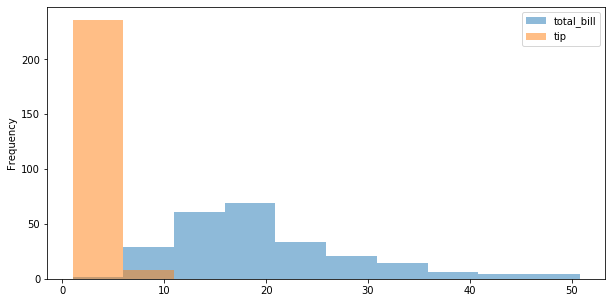

In [2]:
# Note, we import this now to get the dataset.
import seaborn as sns

# Load the tips DataFrame
dft = sns.load_dataset('tips')

# Overplot histograms of the total_bill and tips columns.
dft[['total_bill', 'tip']].plot.hist(alpha=0.5, figsize=(10,5)) ;

-----

While this process was simple, taking one line of code to make the final visualization, some important steps were hidden. This code can make it difficult, therefore, to modify how the visualization is generated or to control the appearance of key aspects, such as the colors used, the descriptive text used to annotate the visualization, and the size of plot components. Thus, in the rest of this notebook, we will dig into the matplotlib module, which forms the foundation for almost all Python plotting, to understand how all aspects of a simple visualization are created and modified.


## Matplotlib Basics

The matplotlib plotting library provides powerful data visualization functionality. The recommended method to use matplotlib is via the pyplot interface as it provides an object-oriented access to the full matplotlib library. Since we will be focusing on writing Python programs, we will use the pyplot access method. The basic concept behind creating a visualization is to create a _figure_ upon which a _visualization_ will be made. The _figure_ is represented in matplotlib by a `Figure` object, while the _visualization_ is represented by an `Axes` object.

Thus, our first step in using matplotlib will be to import that pyplot interface:

```python
    import matplotlib.pyplot as plt
```

The second step will be to create a `Figure` object that will allow us to control the global appearance of our visualization. This object can include, among other things, the size and the resolution (or dots per inch) of the generated figure. We make a `Figure` object by calling the `figure()` method within our `pyplot` interface:

```python
    fig = plt.figure()
```

Next, we create an `Axes` object, which allows us to make an actual plot within our figure. By separating out these concepts, we can easily add multiple subplots to our figure, although for now, we will simply stick to a single plot. We can easily add a subplot to our `Figure` object:
```python
    ax = fig.add_subplot()
```

Of course, for a quick and simple plot, the matplotlib library provides a shortcut form that both creates the `Figure` object and creates a single subplot `Axes` object:

```python
    fig, ax = plt.subplots()
```
We will use this simple technique for now, but in later examples, we may occasionally switch to the more expressive technique of explicitly creating the `Figure` and `Axes` objects to have more control over the resulting plot.

One last point, the `figure` and `subplots` functions accept a parameter called `figsize` that controls the size of the resulting figure. This option is specified as a Python tuple that includes the horizontal size and vertical size. For example, to make a figure 8 units wide and 5 units tall, you specify `figsize=(8,5)` to the `figure` function. Note, the unit is technically inches but may appear differently on different resolution devices. Experiment with this tuple in the following code block to learn how to change the size of your plots.

In the following code block, we demonstrate the basic concepts required to create a simple plot by using matplotlib.

-----

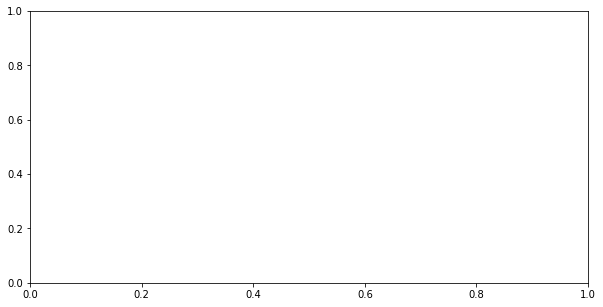

In [3]:
# First, we need to import matplotlib
import matplotlib.pyplot as plt

# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots(figsize=(10,5))

# We do not need this line; the notebook will automatically 
# display when the code block completes. But we include it to make it clear
# that Python programs do require it.
plt.show()

-----

Now, this plot is rather boring; we simply have an empty box with labels on the bottom and left-hand sides. This box encloses your default plot area, and the labels show that, by default, your first plot spans zero to one in both the horizontal, or x-axis, and the vertical, or y-axis.

Our next step will be to actually display something. But first, I want to briefly discuss our use of the Jupyter notebook. Since this course will focus on the use of notebooks to analyze and understand data, we will not repeat boilerplate code (such as `import matplotlib as plt`). When writing a Python program, however, each program must include all necessary code, and thus one can't simply cut-and-paste code from a notebook to create a stand-alone Python program. As another example, we will not always explicitly call the matplotlib `show()` method, which generates and displays a figure. By default, matplotlib does not actually create a plot until it is forced to do so. While a Jupyter notebook will generally do this automatically, this must be done explicitly within a normal Python program.

------




## Plotting Data with Matplotlib

Now, given the `Axes` object, we can simply pass the data we wish to visualize to the `plot()` method. In the following code sample, we use numpy to create an array of linearly spaced values, which will be our independent variable. Next, we define two constants: `m` and `b`, that will be used to create our dependent variable. Given these two arrays, we can plot this sequence of points, which are a linear function, by passing them to the `plot()` method.

Note that you can change the `m` and `b` values and reprocess the cell (either by using the toolbar at the top or  using the `shift+enter` key combination within the cell).

-----

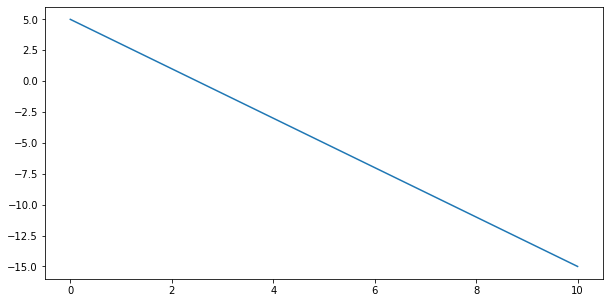

In [4]:
import numpy as np

# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots(figsize=(10,5))

# Now we generate something to plot. In this case, we will plot a straight line.
# You can change the constants: m and b, in the equation below to get a different plot.

m = -2
b = 5
x = np.linspace(0,10)
y = m * x + b

# Plot the data we just generated, connecting the points with lines
ax.plot(x, y)

# We call plt.show() explicitly here to demonstrate how to call this in a Python program
plt.show()

-----

### Adding Text Information

You have now plotted a linear function! But overall, the plot remains uninformative, so let's add information to make our plot self-contained. First, we can place descriptive text along both axes. This text is known as an axis label and can be easily added to your plot by calling the appropriate set function on our `Axes` object:

```python
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
```

Second, most plots benefit from having a title that gives context for the rest of the data in the plot. You also might consider adding your name to your plot, either in the title or within the plot box itself (which will be discussed later).
```python
    ax.set_title("Our first plot!")
```

Together, these new methods will improve the readability of our plot, as shown below, where we now have a two-dimensional plot with axes labels and a title.

-----

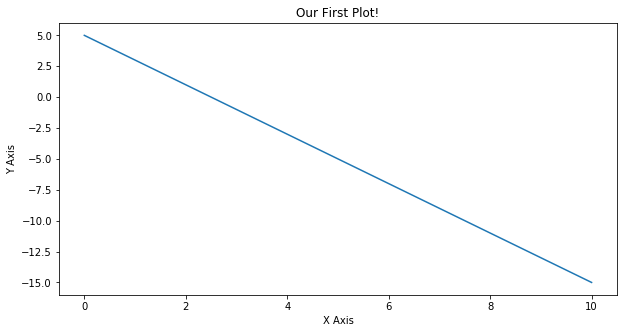

In [5]:
# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots(figsize=(10,5))

# Now we generate something to plot. In this case, we will plot a straight line.
ax.plot(x, y)

# Set our axis labels
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")

ax.set_title("Our First Plot!")

plt.show()

-----

### Restricting the Axes Range

Matplotlib provides you with a great deal of control over the appearance of your plot. Two items you may wish to change include the degree to which your plot fills the subplot box and how the numbers are displayed on the axes. For the first item, you can change the range displayed in the x-axis, the y-axis, or both by simply setting the limits displayed by matplotlib. For instance, we can change the x-axis to show -2 to 12 and the y-axis to show -20 to 10:

```python
    ax.set_xlim(-2, 12)
    ax.set_ylim(-20, 10)
```
In this case, we have told matplotlib to change our display to span from -2 to 12 in the x-direction and from -20 to 10 in the y-direction.

You also can change how the numbers are displayed on the plot, which is done at specific intervals on the axes, which are known as ticks. Once again, you can control each axis independently and change only one or both by using the appropriate _set_ method:

```python
    ax.set_xticks(np.arange(0, 15, 5))
    ax.set_yticks(np.arange(-15, 10, 5))
```
In this example, we have used the `arange` method from NumPy to create an array of labels. The x-axis labels will now include 0, 5, and 10, while the y-axis labels will include -15, -10. -5, 0, and 5. Of course, you can change these values to whatever you like, but be careful since using too many ticks (and thus numerical labels as well) can cause your plot to become overly full and hard to read.

-----

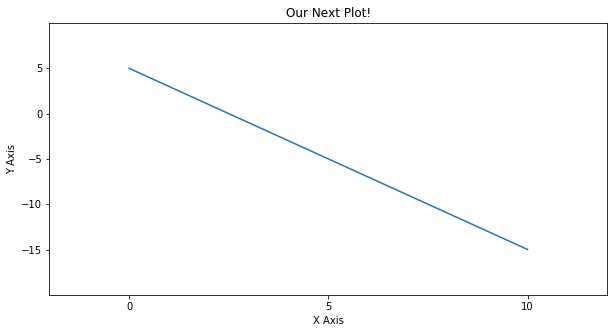

In [6]:
# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots(figsize=(10,5))

# Now we generate something to plot. In this case, we will plot a straight line.
ax.plot(x, y)

# Set our axis labels
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")

# Change the axis limits displayed in our plot
ax.set_xlim(-2, 12)
ax.set_ylim(-20, 10)

# Change the ticks on each axis and the corresponding numerical values that are displayed
ax.set_xticks(np.arange(0, 15, 5))
ax.set_yticks(np.arange(-15, 10, 5))
    
# Set the title
ax.set_title("Our Next Plot!")

plt.show()

-----

<font color='red' size = '5'> Student Exercise </font>

In the empty **Code** cell below, write and execute code to make a new plot based on the previous code cells, but where `m = 2`. Also, change the labels for the x and y axes to be `Height (cm)` and `Mass (kg)`, respectively.

-----

-----

## Plotting Multiple Functions

We are not restricted to plotting only one item within a matplotlib figure. We can either call plot twice with different data or, alternatively, pass multiple data to the plot method itself.

```python
    ax.plot(x1, y1)
    ax.plot(x2, y2)
```
or equivalently:
```python
    ax.plot(x1,y1, x2,y2)
```
Note that when plotting multiple items, you may need to change your axis limits or ticks to ensure everything is properly displayed. For instance, in the demonstration below, we have changed our y-axis limits to be -20 to 20 and our y-axis labels to now run to 15.

-----

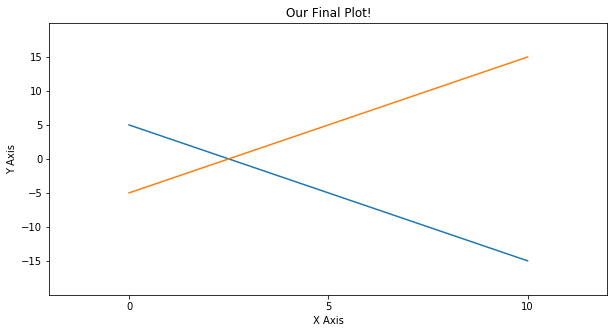

In [7]:
# Create our figure and axes for the plot
fig, ax = plt.subplots(figsize=(10,5))

# Now we generate something to plot. In this case, we will plot a straight line.
x1 = np.linspace(0,10)
y1 = m * x1 + b

x2 = x1
y2 = -1 * y1

# We can either plot each set of data separately as shown, or plot them all at 
# once by calling ax.plot(x1, y1, x2, y2)

ax.plot(x1, y1)
ax.plot(x2, y2)

# Set our axis labels
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")

# Change the axis limits displayed in our plot
ax.set_xlim(-2, 12)
ax.set_ylim(-20, 20)

# Change the ticks on each axis and the corresponding numerical values that are displayed
ax.set_xticks(np.arange(0, 15, 5))
ax.set_yticks(np.arange(-15, 20, 5))
    
# Set the title
ax.set_title("Our Final Plot!")

plt.show()

-----

You should notice how matplotlib changed the plot color for the two functions being displayed. While this change was done automatically in this case, you can explicitly change the color, the line style, the line width, and many other plot characteristics should you so choose. We will cover some of these topics in later modules, but you are encouraged to look at the matplotlib documentation (and [example gallery](http://matplotlib.org/gallery.html)) to learn more.

-----

-----

<font color='red' size = '5'> Student Exercise </font>

In the empty **Code** cell below, write and execute code to make a new plot for a quadratic function (i.e., $y = m x^2 + b$) based on the previous code cells, but where `m = 4`. Also, give your plot a suitable title and change the labels for the x and y axes to be `Height (cm)` and `Mass (kg)`, respectively.

-----

## Introduction to Seaborn

While the matplotlib library provides powerful plotting functionality to the Python programmer, the matplotlib API can be rather daunting for beginners, and the basic color schemes and plot styles are not the most visually appealing. For anyone who has been exposed to the work and ideas of [Edward Tufte][i], the importance of making good data visualizations cannot be understated. As a result, other libraries have been developed that build on the matplotlib legacy and provide both improved visual aesthetics as well as new plot functions. Of these, one of the most interesting is the [seaborn][1] library. 

Seaborn is easy to start using, yet introduces a number of new powerful plot styles along with statistical functionality that can make difficult plotting tasks simple. Seaborn also simplifies the task of removing plot clutter, and you also can choose from different color palettes that have already been screened to maximize the visual impact of your new plots. Seaborn can be easily imported into your Python program by using `import seaborn as sns`, and with one function call to `sns.set()`, your plot colors and styles can be improved. The `set` method takes a number of parameters like `style` or `font` that you can also specify explicitly, as shown later in this notebook.

-----
[i]: http://www.edwardtufte.com/tufte/
[1]: http://web.stanford.edu/~mwaskom/software/seaborn/index.html

To demonstrate the impact of these two Python statements, we can simply repeat one of the first Python visualization examples from earlier in this Jupyter Notebook. In this case, we are simply plotting two lines, along with labels for the `x`- and `y`-axes and a title for the plot. Compare this version with the same plot created by only using the matplotlib library.

-----

In [10]:
# Start using the seaborn library. Note that this will remain in effect in your 
# Notebook until the Kernel is restarted or you issue a reset() call.

import seaborn as sns

sns.set()

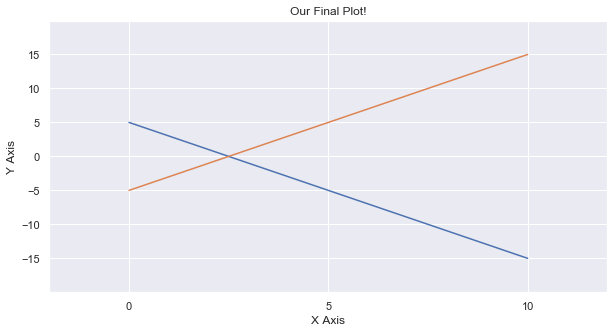

In [11]:
# Repeat this plot, but now with seaborn default style.

# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots(figsize=(10,5))

# We can either plot each set of data separately as shown, or plot them all at 
# once by calling ax.plot(x1, y1, x2, y2)

ax.plot(x1, y1)
ax.plot(x2, y2)

# Set our axis labels
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")

# Change the axis limits displayed in our plot
ax.set_xlim(-2, 12)
ax.set_ylim(-20, 20)

# Change the ticks on each axis and the corresponding numerical values that are displayed
ax.set_xticks(np.arange(0, 15, 5))
ax.set_yticks(np.arange(-15, 20, 5))
    
# Set the title
ax.set_title("Our Final Plot!")

plt.show()

-----

In the previous plot, you saw how by simply using the _seaborn_ plotting library, the plot appearance changed. This aspect is one of the primary benefits of using seaborn, in that the color schemes and plotting styles have already been well-thought-out (note that in newer versions of the matplotlib library, default color schemes are significantly improved). In this case, a grey background with soft lines at the tick marks is used along with a specific font type. However, seaborn provides the capability of changing the plot appearance, both by using other predefined styles as well as specific features in the plot.

In the following Code cell, we demonstrate how to change the overall appearance of the plot by using a white style with tick marks and a specific seaborn context, which can take one of four predefined types:

- `notebook`
- `paper`
- `talk`
- `poster`

which can be used in a `with` statement. We also use the `despine` method, which can remove the box appearance of the plot, and we change the font size, resulting in a very different plot appearance.

-----

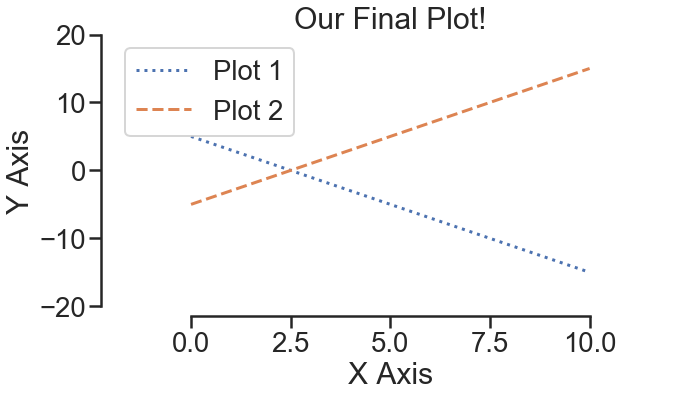

In [12]:
# Now seaborn specific modifications
sns.set_context("poster", font_scale=1.25)
sns.set_style("white")
sns.set_style("ticks")

# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots(figsize=(10,5))

# We can either plot each set of data separately as shown, or plot them all at 
# once by calling ax.plot(x1, y1, x2, y2)

ax.plot(x1, y1, label = 'Plot 1', ls = ':')
ax.plot(x2, y2, label = 'Plot 2', ls = '--')

# Set our axis labels
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")

plt.legend(loc='upper left')

# Change the axis limits displayed in our plot
ax.set_xlim(-2, 12)
ax.set_ylim(-20, 20)

# Set the title
ax.set_title("Our Final Plot!")

# Now seaborn specific modifications
sns.despine(offset=10, trim=True)

-----

<font color='red' size = '5'> Student Exercise </font>

In the empty **Code** cell below, write and execute code to make a new plot for two different cubic functions (i.e., $y = m x^3 + b$) based on the previous Code cells, but where `m = 2` and `m=6` (you can choose your own values for `b`). Give your plot a suitable title, add a legend, and change the labels for the x and y axes to be `Height (cm)` and `Mass (kg)`, respectively.

-----

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

1. [Matplotlib pyplot tutorial][1]
2. [Matplotlib tutorial][2] from Scipy
4. [Seaborn tutorial][4]
3. The [visualization chapter][pdc] from the book _Python Data Science Handbook_ by Jake VanderPlas

-----

[1]: http://matplotlib.org/users/pyplot_tutorial.html
[2]: http://www.scipy-lectures.org/intro/matplotlib/index.html
[4]: http://seaborn.pydata.org/tutorial.html
[pdc]: http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode